In [70]:
#import library for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns
import datetime
from folium.plugins import HeatMap
import calendar
%matplotlib inline

In [2]:
#dowload dataset as dataframe
data = pd.read_csv('../ML-projects/sanfan_crime/Police_Department_Incidents_-_Previous_Year__2016_.csv',parse_dates = ['Date'])
data = data.dropna()

In [3]:
#observe data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150499 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150499 non-null int64
Category      150499 non-null object
Descript      150499 non-null object
DayOfWeek     150499 non-null object
Date          150499 non-null datetime64[ns]
Time          150499 non-null object
PdDistrict    150499 non-null object
Resolution    150499 non-null object
Address       150499 non-null object
X             150499 non-null float64
Y             150499 non-null float64
Location      150499 non-null object
PdId          150499 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 16.1+ MB


In [4]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.504990e+05,150499.000000,150499.000000,1.504990e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535983e+06,0.026210,0.023637,5.535983e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


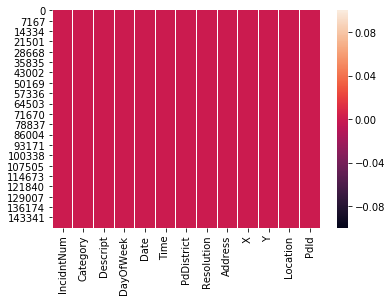

In [5]:
#observe missing values by heatmap
sns.heatmap(data.isna())

In [6]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [7]:
pd.unique(data['Resolution'])

array(['ARREST, BOOKED', 'NONE', 'JUVENILE BOOKED', 'ARREST, CITED',
       'UNFOUNDED', 'JUVENILE DIVERTED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'EXCEPTIONAL CLEARANCE',
       'LOCATED', 'PSYCHOPATHIC CASE', 'COMPLAINANT REFUSES TO PROSECUTE',
       'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE CITED'],
      dtype=object)

In [8]:
top_5_category = pd.value_counts(data['Category']).head()
print(top_5_category)

LARCENY/THEFT     40408
OTHER OFFENSES    19599
NON-CRIMINAL      17866
ASSAULT           13577
VANDALISM          8589
Name: Category, dtype: int64


In [9]:
top_5_resolution = pd.value_counts(data['Resolution']).head(5)
print(top_5_resolution)

NONE                     107779
ARREST, BOOKED            39416
UNFOUNDED                  1608
JUVENILE BOOKED            1056
EXCEPTIONAL CLEARANCE       371
Name: Resolution, dtype: int64


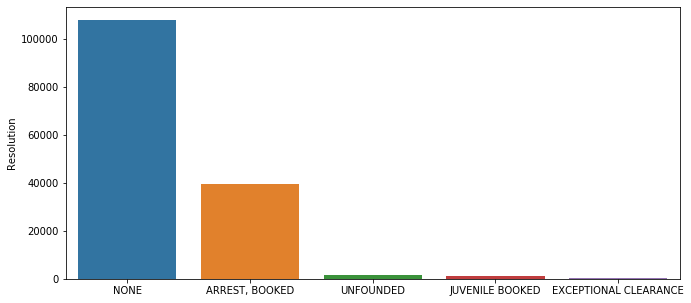

In [10]:
plt.figure(figsize=(11,5))
sns.barplot(x = top_5_resolution.index,y= top_5_resolution)

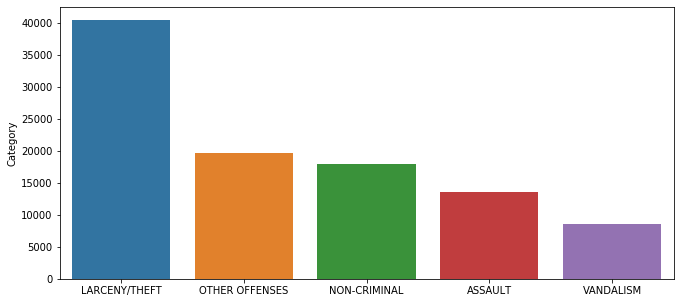

In [11]:
plt.figure(figsize=(11,5))
sns.barplot(x = top_5_category.index, y = top_5_category)

In [12]:
pd.unique(data['Category'])

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [23]:
df = data[['Category','Date','X','Y']]
gta = df[df['Category']=='VEHICLE THEFT']

In [24]:
san = folium.Map((37.773972,-122.431297),zoom_start=12)
HeatMap(list(zip(gta['Y'],gta['X']))).add_to(san)
san

In [73]:
gta['Date'].str

AttributeError: 'Series' object has no attribute 'day'

In [61]:
a = np.array(gta[['X','Y']])

In [ ]:
gta['X'][10]

In [69]:
gta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40408 entries, 10 to 150498
Data columns (total 4 columns):
Category    40408 non-null object
Date        40408 non-null datetime64[ns]
X           40408 non-null float64
Y           40408 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.5+ MB
